In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
from sklearn.model_selection import train_test_split

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

!pip install matplotlib_venn
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
from matplotlib_venn import venn2, venn2_circles


import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\
Drive/Fall_Projects/Data_Programming/New_pythonProject/movies.zip

Archive:  gdrive/MyDrive/Fall_Projects/Data_Programming/New_pythonProject/movies.zip
  inflating: movies/movies_metadata.csv  
  inflating: movies/MoviesOnStreamingPlatforms_updated.csv  


In [ ]:
# Dataset for customer-based analysis
cust = pd.read_csv("movies/MoviesOnStreamingPlatforms_updated.csv")

# Dataset for platform-based analysis
plat = pd.read_csv("movies/movies_metadata.csv")

#Customer Based Analysis

In [ ]:
cust.shape

(9515, 17)

In [ ]:
#try to find out if Type contains any useful information 
cust[cust['Type']==1].shape

(0, 17)

In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9515 non-null   int64  
 1   ID               9515 non-null   int64  
 2   Title            9515 non-null   object 
 3   Year             9515 non-null   int64  
 4   Age              5338 non-null   object 
 5   IMDb             9309 non-null   object 
 6   Rotten Tomatoes  9508 non-null   object 
 7   Netflix          9515 non-null   int64  
 8   Hulu             9515 non-null   int64  
 9   Prime Video      9515 non-null   int64  
 10  Disney+          9515 non-null   int64  
 11  Type             9515 non-null   int64  
 12  Directors        9104 non-null   object 
 13  Genres           9399 non-null   object 
 14  Country          9261 non-null   object 
 15  Language         9202 non-null   object 
 16  Runtime          9196 non-null   float64
dtypes: float64(1),

In [ ]:
#drop the columns that is not needed
cust = cust.drop(['Unnamed: 0', 'ID', 'Type'], axis = 'columns')

In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9515 non-null   object 
 1   Year             9515 non-null   int64  
 2   Age              5338 non-null   object 
 3   IMDb             9309 non-null   object 
 4   Rotten Tomatoes  9508 non-null   object 
 5   Netflix          9515 non-null   int64  
 6   Hulu             9515 non-null   int64  
 7   Prime Video      9515 non-null   int64  
 8   Disney+          9515 non-null   int64  
 9   Directors        9104 non-null   object 
 10  Genres           9399 non-null   object 
 11  Country          9261 non-null   object 
 12  Language         9202 non-null   object 
 13  Runtime          9196 non-null   float64
dtypes: float64(1), int64(5), object(8)
memory usage: 1.0+ MB


In [ ]:
cust.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,Roma,2018,18+,7.7/10,94/100,1,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [ ]:
cust['Rotten Tomatoes'][0]

'98/100'

In [ ]:
#Turn the rating into numeric 

#IMDb
cust['IMDb'] = cust['IMDb'].str.replace("/10", "")
cust['IMDb'] = pd.to_numeric(cust["IMDb"])

#Rotten Tomatoes
cust['Rotten Tomatoes'] = cust['Rotten Tomatoes'].str.replace("/100", "")
cust['Rotten Tomatoes'] = pd.to_numeric(cust["Rotten Tomatoes"])

In [ ]:
#missig data 

null_values = pd.DataFrame(cust.isnull().sum() / cust.shape[0] * 100).reset_index()
print(null_values)

null_values = null_values.rename(columns={'index':'Column Name', 0:'Missing Percentage'})
null_values = null_values[null_values['Missing Percentage'] > 0].sort_values(by='Missing Percentage', ascending=False)

print(null_values)

              index          0
0             Title   0.000000
1              Year   0.000000
2               Age  43.899107
3              IMDb   2.165003
4   Rotten Tomatoes   0.073568
5           Netflix   0.000000
6              Hulu   0.000000
7       Prime Video   0.000000
8           Disney+   0.000000
9         Directors   4.319496
10           Genres   1.219128
11          Country   2.669469
12         Language   3.289543
13          Runtime   3.352601
        Column Name  Missing Percentage
2               Age           43.899107
9         Directors            4.319496
13          Runtime            3.352601
12         Language            3.289543
11          Country            2.669469
3              IMDb            2.165003
10           Genres            1.219128
4   Rotten Tomatoes            0.073568


In [ ]:
cust.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,The Irishman,2019,18+,7.8,98.0,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,Dangal,2016,7+,8.4,97.0,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,David Attenborough: A Life on Our Planet,2020,7+,9.0,95.0,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,Lagaan: Once Upon a Time in India,2001,7+,8.1,94.0,1,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,Roma,2018,18+,7.7,94.0,1,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9515 non-null   object 
 1   Year             9515 non-null   int64  
 2   Age              5338 non-null   object 
 3   IMDb             9309 non-null   float64
 4   Rotten Tomatoes  9508 non-null   float64
 5   Netflix          9515 non-null   int64  
 6   Hulu             9515 non-null   int64  
 7   Prime Video      9515 non-null   int64  
 8   Disney+          9515 non-null   int64  
 9   Directors        9104 non-null   object 
 10  Genres           9399 non-null   object 
 11  Country          9261 non-null   object 
 12  Language         9202 non-null   object 
 13  Runtime          9196 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.0+ MB


Text(0.5, 1.0, 'Missing Percentage by Columns')

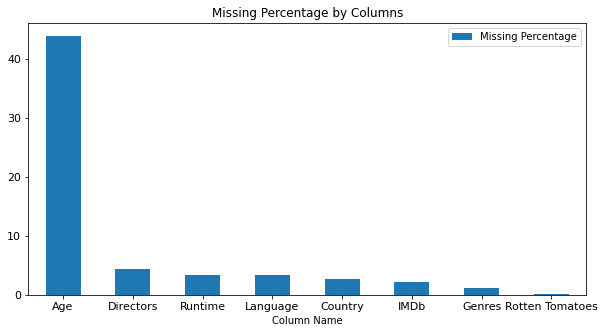

In [ ]:
# Visualize missing data
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11) 
axes = null_values.plot.bar(x='Column Name', y='Missing Percentage', rot=0)
plt.title('Missing Percentage by Columns')

In [ ]:
cust = cust.drop('Age', axis=1)

In [ ]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9515 non-null   object 
 1   Year             9515 non-null   int64  
 2   IMDb             9309 non-null   float64
 3   Rotten Tomatoes  9508 non-null   float64
 4   Netflix          9515 non-null   int64  
 5   Hulu             9515 non-null   int64  
 6   Prime Video      9515 non-null   int64  
 7   Disney+          9515 non-null   int64  
 8   Directors        9104 non-null   object 
 9   Genres           9399 non-null   object 
 10  Country          9261 non-null   object 
 11  Language         9202 non-null   object 
 12  Runtime          9196 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 966.5+ KB


In [ ]:
# Create dfs for each platform
Netflix = cust[cust['Netflix']==1]
Hulu = cust[cust['Hulu']==1]
PrimeVideo = cust[cust['Prime Video']==1]
Disney = cust[cust['Disney+']==1]

In [ ]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3695 entries, 0 to 3694
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            3695 non-null   object 
 1   Year             3695 non-null   int64  
 2   Age              1898 non-null   object 
 3   IMDb             3590 non-null   float64
 4   Rotten Tomatoes  3688 non-null   float64
 5   Netflix          3695 non-null   int64  
 6   Hulu             3695 non-null   int64  
 7   Prime Video      3695 non-null   int64  
 8   Disney+          3695 non-null   int64  
 9   Directors        3519 non-null   object 
 10  Genres           3631 non-null   object 
 11  Country          3564 non-null   object 
 12  Language         3546 non-null   object 
 13  Runtime          3534 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 433.0+ KB


### Visualize overlap and Unique movies on different platfoms using a venn diagram

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


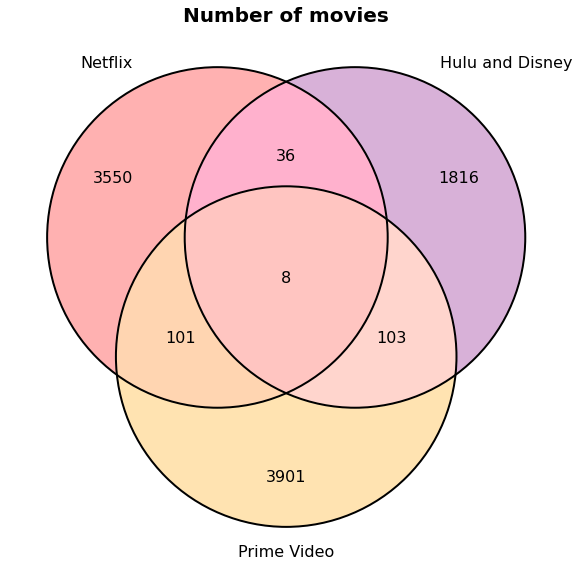

In [ ]:
vennN = Netflix['Title']
vennH = Hulu['Title']
vennD = Disney['Title']
vennP = PrimeVideo['Title']

# For this venn diagram, Disney & Hulu are combined since they belong to the same company
vennDH = pd.concat([vennH, vennD])

plt.figure(figsize=(10,10))
vd3 = venn3_unweighted([set(vennN.to_list()), 
       set(vennDH.to_list()),
       set(vennP.to_list())],
       set_labels=('Netflix', 'Hulu and Disney','Prime Video'),set_colors=('red','purple','orange'), alpha=0.3)
areas = (1, 1, 1, 1, 1, 1, 1)
venn3_circles((1, 1, 1, 1, 1, 1, 1))
for text in vd3.set_labels:
 text.set_fontsize(16);
for text in vd3.subset_labels:
 text.set_fontsize(16)
 plt.title('Number of movies',fontname='Times New Roman',fontweight='bold',fontsize=20)
plt.show()

In [ ]:
#What movies are on all three platforms?
cust[(cust['Netflix'] == 1) & (cust['Prime Video']==1) & ((cust['Hulu']==1)|(cust['Disney+']==1))]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
184,Underworld,2003,18+,7.0,79.0,1,1,1,0,Len Wiseman,"Action,Fantasy,Thriller","United States,United Kingdom,Germany,Hungary",English,121.0
327,Zack and Miri Make a Porno,2008,18+,6.5,74.0,1,1,1,0,Kevin Smith,"Comedy,Romance",United States,English,101.0
666,The Outsider,2018,NaN,6.3,67.0,1,1,1,0,NaN,"Crime,Drama,Fantasy,Mystery,Thriller",United States,English,60.0
821,The Stepfather,2009,13+,5.6,65.0,1,1,1,0,Nelson McCormick,"Crime,Thriller",United States,"English,German",101.0
1330,Zapped,2014,all,5.2,59.0,1,1,1,1,Atlee Kumar,"Action,Thriller",India,Tamil,172.0
1465,The Girl King,2015,NaN,5.9,57.0,1,1,1,0,Mika Kaurismäki,"Biography,Drama,History,Romance","Finland,Canada,Germany,Sweden","English,French,German,Latin,Italian",106.0
1830,A Second Chance,2015,NaN,7.1,54.0,1,1,1,0,Clay Glen,"Adventure,Drama,Family,Mystery,Sport",Australia,English,90.0
2170,For the Birds,2018,NaN,6.7,50.0,1,0,1,1,Ralph Eggleston,"Animation,Short,Comedy,Family",United States,None,3.0


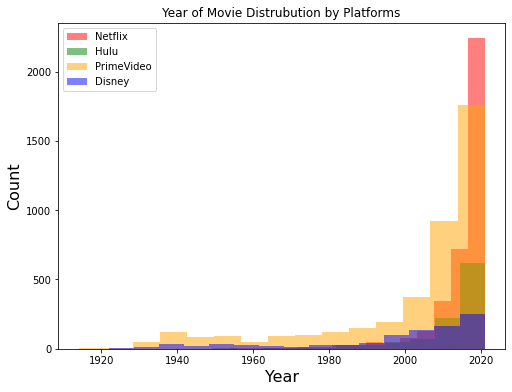

In [ ]:
# Visualize which of the 4 platforms has more recent movies 
plt.figure(figsize=(8,6))
plt.hist(Netflix["Year"], bins=15, alpha=0.5, label="Netflix", color='red')
plt.hist(Hulu["Year"], bins=15, alpha=0.5, label="Hulu", color='green')
plt.hist(PrimeVideo["Year"], bins=15, alpha=0.5, label="PrimeVideo", color='orange')
plt.hist(Disney["Year"], bins=15, alpha=0.5, label="Disney", color='blue')

plt.xlabel("Year", size=16)
plt.ylabel("Count", size=16)
plt.title("Year of Movie Distrubution by Platforms")
plt.legend(loc='upper left')

In [ ]:
# How many unique genres across all platforms?
g = cust[cust['Genres'].notna()]['Genres'].tolist()
all_genre = ','.join(g).split(',')

unique_genre = []
 
for i in all_genre:
    if i not in unique_genre:
        unique_genre.append(i)

len(unique_genre)

27

###Visualize the genre distribution across each platform

Text(0.5, 1.0, 'Netflix Movie Genres Distribution')

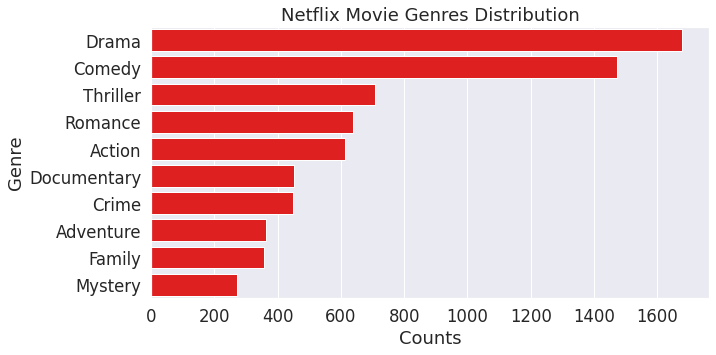

In [ ]:
# Netflix
n_g = Netflix[Netflix['Genres'].notna()]['Genres'].tolist()
n_g_list = ','.join(n_g).split(',')

n_g_count = Counter(n_g_list)

df_n_g = pd.DataFrame(columns=['Genre', 'Counts'], 
                           data = {'Genre':[val for val in n_g_count.keys()],
                                    'Counts': [val for val in n_g_count.values()]}).sort_values(by='Counts', ascending=False).reset_index(drop=True)

sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
sns.barplot(data = df_n_g.head(10), x="Counts", y="Genre", color = 'red')

plt.title('Netflix Movie Genres Distribution')

Text(0.5, 1.0, 'Hulu Movie Genres Distribution')

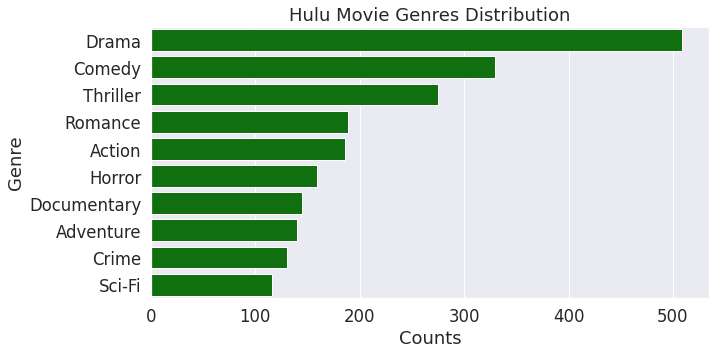

In [ ]:
#Hulu
h_g = Hulu[Hulu['Genres'].notna()]['Genres'].tolist()
h_g_list = ','.join(h_g).split(',')

h_g_count = Counter(h_g_list)

df_h_g = pd.DataFrame(columns=['Genre', 'Counts'], 
                           data = {'Genre':[val for val in h_g_count.keys()],
                                    'Counts': [val for val in h_g_count.values()]}).sort_values(by='Counts', ascending=False).reset_index(drop=True)

sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
sns.barplot(data = df_h_g.head(10), x="Counts", y="Genre", color = 'green')

plt.title('Hulu Movie Genres Distribution')

Text(0.5, 1.0, 'PrimeVideo Movie Genres Distribution')

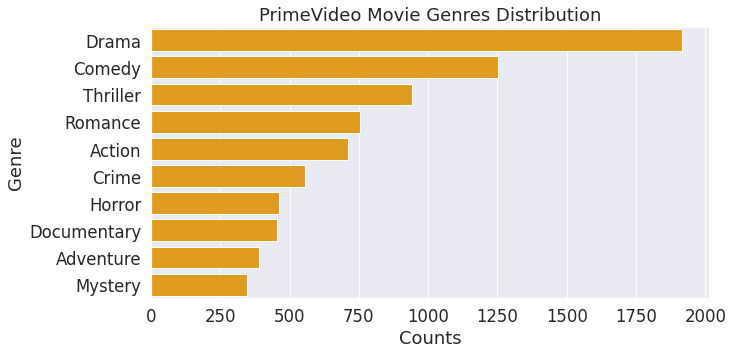

In [ ]:
# Prime
p_g = PrimeVideo[PrimeVideo['Genres'].notna()]['Genres'].tolist()
p_g_list = ','.join(p_g).split(',')

p_g_count = Counter(p_g_list)

df_p_g = pd.DataFrame(columns=['Genre', 'Counts'], 
                           data = {'Genre':[val for val in p_g_count.keys()],
                                    'Counts': [val for val in p_g_count.values()]}).sort_values(by='Counts', ascending=False).reset_index(drop=True)

sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
sns.barplot(data = df_p_g.head(10), x="Counts", y="Genre", color = 'orange')

plt.title('PrimeVideo Movie Genres Distribution')

Text(0.5, 1.0, 'Disney Movie Genres Distribution')

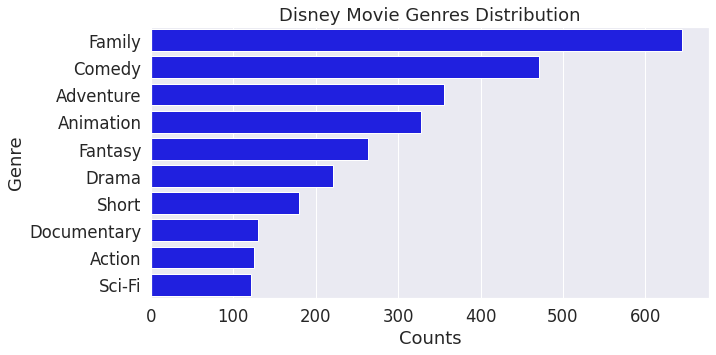

In [ ]:
# Disney
d_g = Disney[Disney['Genres'].notna()]['Genres'].tolist()
d_g_list = ','.join(d_g).split(',')

d_g_count = Counter(d_g_list)

df_d_g = pd.DataFrame(columns=['Genre', 'Counts'], 
                           data = {'Genre':[val for val in d_g_count.keys()],
                                    'Counts': [val for val in d_g_count.values()]}).sort_values(by='Counts', ascending=False).reset_index(drop=True)

sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
sns.barplot(data = df_d_g.head(10), x="Counts", y="Genre", color = 'blue')

plt.title('Disney Movie Genres Distribution')

In [ ]:
df_n_g = pd.DataFrame(columns=['Genre', 'Counts'], 
                           data = {'Genre':[val for val in n_g_count.keys()],
                                    'Counts': [val for val in n_g_count.values()]}).sort_values(by='Counts', ascending=False).reset_index(drop=True)

In [ ]:
df_n_g['Platforms'] = 'Netflix'
df_h_g['Platforms'] = 'Hulu'
df_p_g['Platforms'] = 'PrimeVideo'
df_d_g['Platforms'] = 'Disney'

Text(0.5, 1.0, 'Movie Genres Distribution on Different Platform')

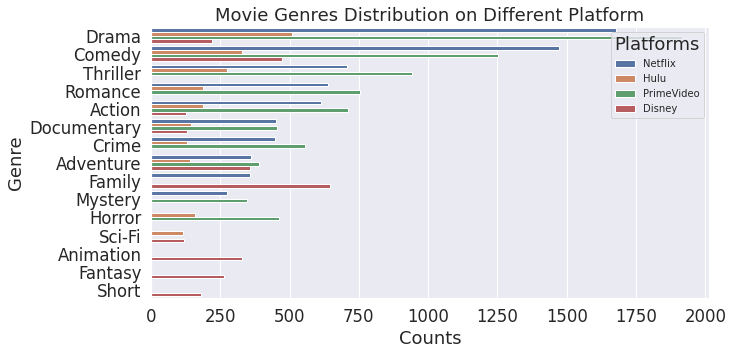

In [ ]:
df1 = pd.concat([df_n_g.head(10), df_h_g.head(10), df_p_g.head(10), df_d_g.head(10)], ignore_index=True)

sns.barplot(data = df1, x="Counts", y="Genre", hue="Platforms")

plt.legend(prop={'size': 10}, title = 'Platforms')
plt.title('Movie Genres Distribution on Different Platform')

###Word Clouds based on movie overview for each platform

In [ ]:
#Take "Movie" out
stopwords = set(STOPWORDS)
stopwords.update(["Movie"])

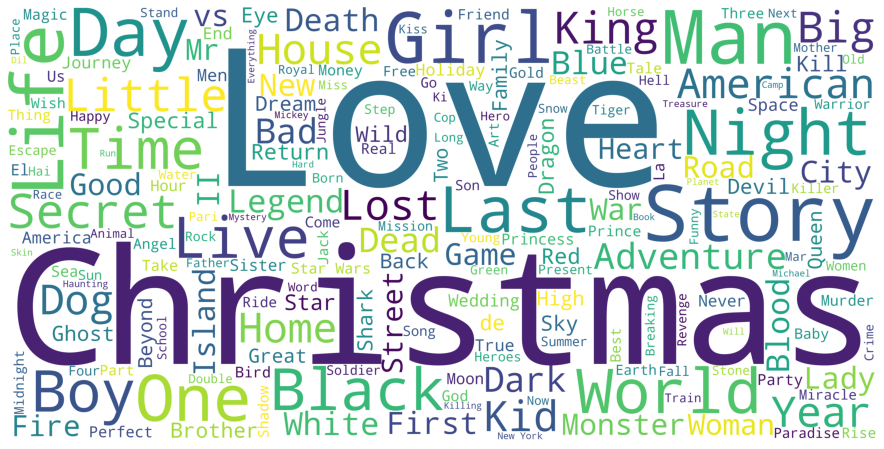

In [ ]:
# General Movie word cloud
cust['Title'] = cust['Title'].astype('str')
cust_title = ' '. join(cust['Title']) 

cust_title_wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(cust_title)
plt.figure(figsize=(16,8))
plt.imshow(cust_title_wordcloud)
plt.axis('off')
plt.show()

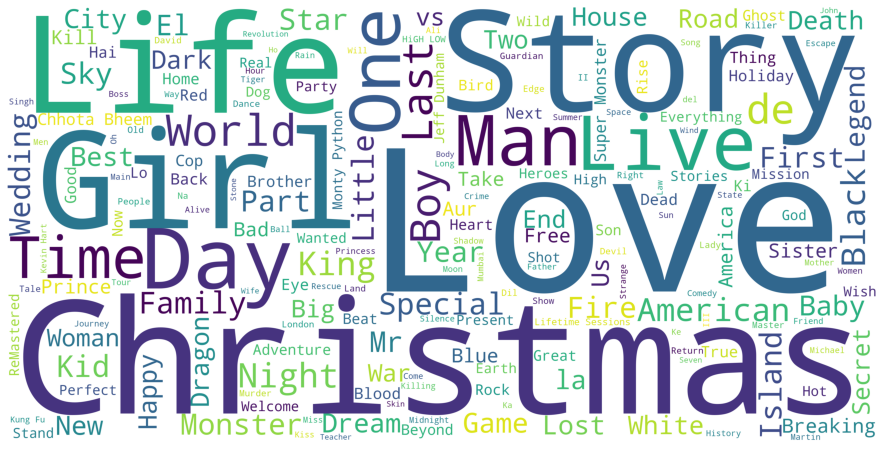

In [ ]:
#Netflix
Netflix['Title'] = Netflix['Title'].astype('str')
Netflix_title = ' '. join(Netflix['Title']) 

Netflix_title_wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(Netflix_title)
plt.figure(figsize=(16,8))
plt.imshow(Netflix_title_wordcloud)
plt.axis('off')
plt.show()

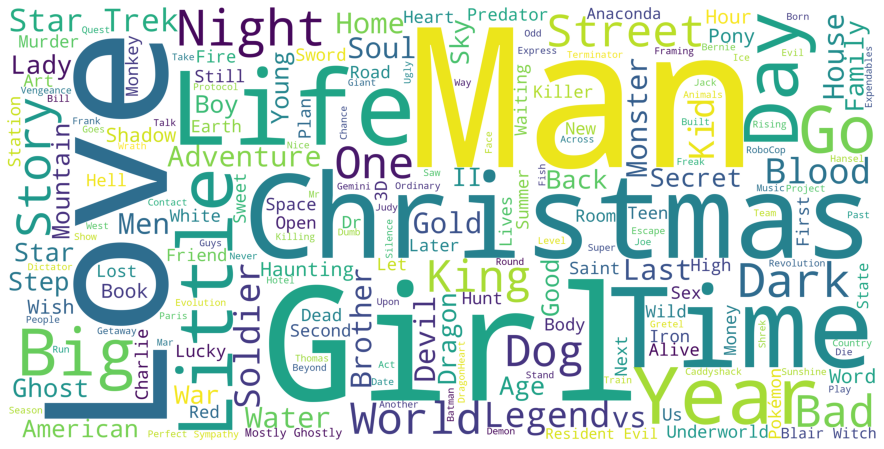

In [ ]:
# Hulu
Hulu['Title'] = Hulu['Title'].astype('str')
Hulu_title = ' '. join(Hulu['Title'])

Hulu_title_wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(Hulu_title)
plt.figure(figsize=(16,8))
plt.imshow(Hulu_title_wordcloud)
plt.axis('off')
plt.show()

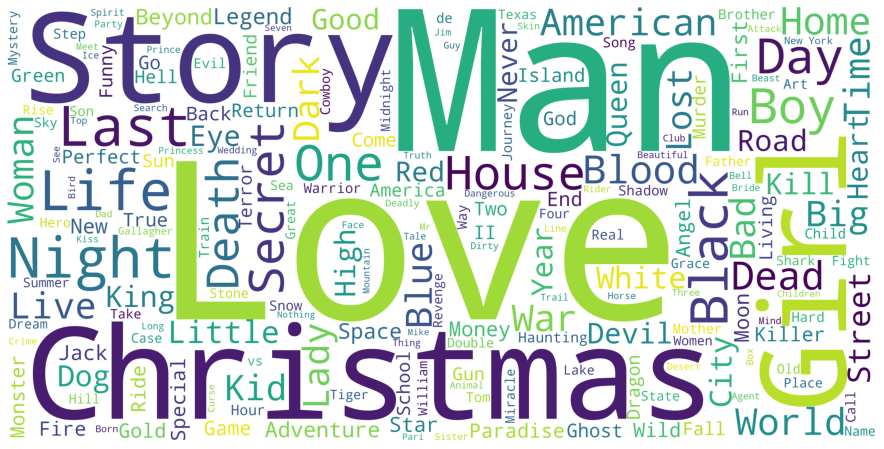

In [ ]:
# Prime Video
PrimeVideo['Title'] = PrimeVideo['Title'].astype('str')
PrimeVideo_title = ' '. join(PrimeVideo['Title'])

PrimeVideo_title_wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(PrimeVideo_title)
plt.figure(figsize=(16,8))
plt.imshow(PrimeVideo_title_wordcloud)
plt.axis('off')
plt.show()

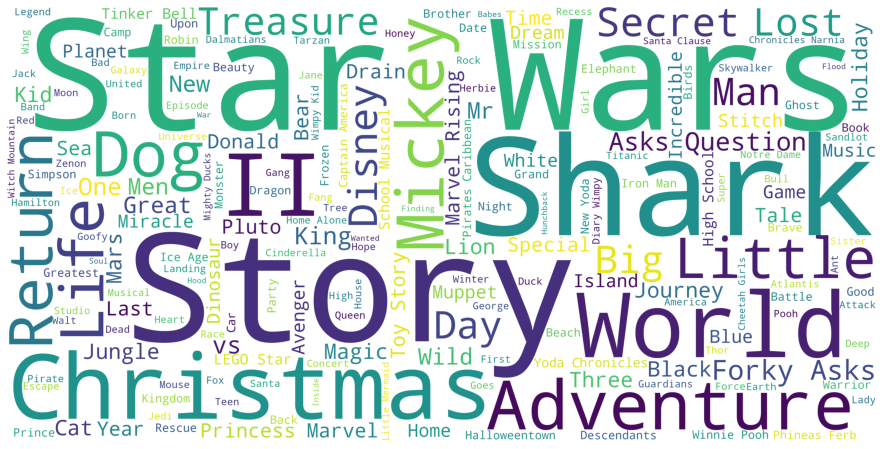

In [ ]:
# Disney
Disney['Title'] = Disney['Title'].astype('str')
Disney_title = ' '. join(Disney['Title'])

Disney_title_wordcloud = WordCloud(stopwords=stopwords, background_color='white', height=2000, width=4000).generate(Disney_title)
plt.figure(figsize=(16,8))
plt.imshow(Disney_title_wordcloud)
plt.axis('off')
plt.show()

###Visualize the Rating Distribution

In [ ]:
#density plot
Netflix['Platforms'] = 'Netflix'
Hulu['Platforms'] = 'Hulu'
PrimeVideo['Platforms'] = 'PrimeVideo'
Disney['Platforms'] = 'Disney'

df2 = pd.concat([Netflix, Hulu, PrimeVideo, Disney], ignore_index=True)
df2.head()

,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Platforms
0,The Irishman,2019,7.8,98.0,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0,Netflix
1,Dangal,2016,8.4,97.0,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0,Netflix
2,David Attenborough: A Life on Our Planet,2020,9.0,95.0,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0,Netflix
3,Lagaan: Once Upon a Time in India,2001,8.1,94.0,1,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0,Netflix
4,Roma,2018,7.7,94.0,1,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0,Netflix


Platforms
Disney        AxesSubplot(0.125,0.125;0.775x0.755)
Hulu          AxesSubplot(0.125,0.125;0.775x0.755)
Netflix       AxesSubplot(0.125,0.125;0.775x0.755)
PrimeVideo    AxesSubplot(0.125,0.125;0.775x0.755)
Name: IMDb, dtype: object

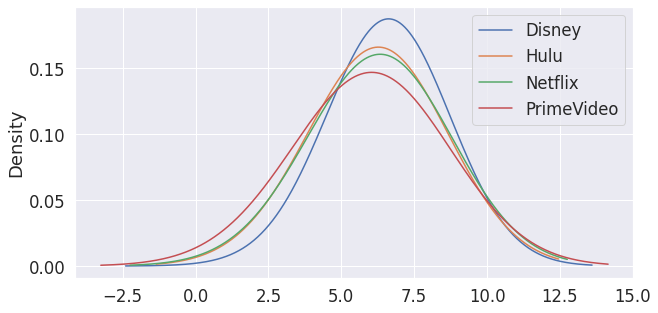

In [ ]:
# IMDb Rating
plt.rcParams['figure.figsize'] = (10, 5)
df2.groupby("Platforms").IMDb.plot(kind="density", legend=True, bw_method=2)

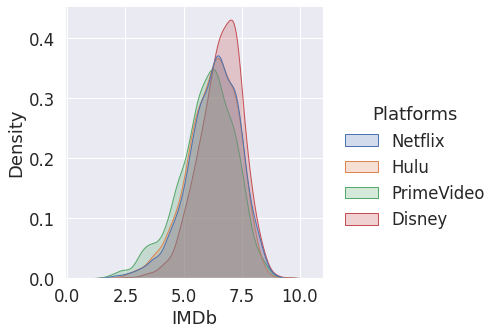

In [ ]:
sns.displot(df2, x="IMDb", hue="Platforms", kind="kde", fill=True,common_norm=False)

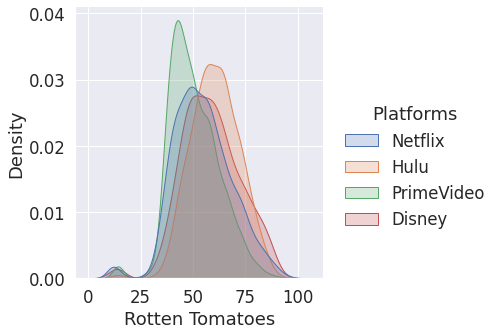

In [ ]:
# Rotten Tomatoes
sns.displot(df2, x="Rotten Tomatoes", hue="Platforms", kind="kde", fill=True,common_norm=False)

#Platform Based Analysis

###Cleaning & Exploring

In [ ]:
plat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
plat.shape

(45466, 24)

In [ ]:
plat.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
platf = plat[['budget', 'revenue', 'genres', 'belongs_to_collection', 'runtime', 'vote_average', 'vote_count']]

In [ ]:
platf.head(2)

,budget,revenue,genres,belongs_to_collection,runtime,vote_average,vote_count
0,30000000,373554033.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","{'id': 10194, 'name': 'Toy Story Collection', ...",81.0,7.7,5415.0
1,65000000,262797249.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,104.0,6.9,2413.0


In [ ]:
platf[platf['revenue'] == 0].shape

(38052, 7)

In [ ]:
platf['revenue'] = platf['revenue'].replace(0, np.nan)

In [ ]:
platf[platf['budget'] == '0'].shape

(36573, 7)

In [ ]:
platf['budget'] = pd.to_numeric(platf['budget'], errors='coerce')
platf['budget'] = platf['budget'].replace(0, np.nan)
platf[platf['budget'].isnull()].shape

(36576, 7)

In [ ]:
# Calculate return on investment
platf['roi'] = platf['revenue'] / platf['budget']
platf[platf['roi'].notnull()].shape

(5381, 8)

In [ ]:
platf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 8890 non-null   float64
 1   revenue                7408 non-null   float64
 2   genres                 45466 non-null  object 
 3   belongs_to_collection  4494 non-null   object 
 4   runtime                45203 non-null  float64
 5   vote_average           45460 non-null  float64
 6   vote_count             45460 non-null  float64
 7   roi                    5381 non-null   float64
dtypes: float64(6), object(2)
memory usage: 2.8+ MB


In [ ]:
platf.describe()

,budget,revenue,runtime,vote_average,vote_count,roi
count,8.890000e+03,7.408000e+03,45203.000000,45460.000000,45460.000000,5.381000e+03
mean,2.160428e+07,6.878739e+07,94.128199,5.618207,109.897338,5.565899e+03
std,3.431063e+07,1.464203e+08,38.407810,1.924216,491.310374,2.168566e+05
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,5.217391e-07
25%,2.000000e+06,2.400000e+06,85.000000,5.000000,3.000000,7.870443e-01
50%,8.000000e+06,1.682272e+07,95.000000,6.000000,10.000000,2.056683e+00
75%,2.500000e+07,6.722707e+07,107.000000,6.800000,34.000000,4.244444e+00
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000,1.239638e+07


In [ ]:
platf[['genres']]

,genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,"[{'id': 35, 'name': 'Comedy'}]"
...,...
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
45462,"[{'id': 18, 'name': 'Drama'}]"
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,[]


In [ ]:
# Create a list for each instance containing the movie genres
platf['genres'] = platf['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

###Creating dummies for each unique genre

In [ ]:
platf[['genres']]

,genres
0,"[Animation, Comedy, Family]"
1,"[Adventure, Fantasy, Family]"
2,"[Romance, Comedy]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]
...,...
45461,"[Drama, Family]"
45462,[Drama]
45463,"[Action, Drama, Thriller]"
45464,[]


In [ ]:
platf.head()

,budget,revenue,genres,belongs_to_collection,runtime,vote_average,vote_count,roi
0,30000000.0,373554033.0,"[Animation, Comedy, Family]","{'id': 10194, 'name': 'Toy Story Collection', ...",81.0,7.7,5415.0,12.451801
1,65000000.0,262797249.0,"[Adventure, Fantasy, Family]",NaN,104.0,6.9,2413.0,4.043035
2,NaN,NaN,"[Romance, Comedy]","{'id': 119050, 'name': 'Grumpy Old Men Collect...",101.0,6.5,92.0,NaN
3,16000000.0,81452156.0,"[Comedy, Drama, Romance]",NaN,127.0,6.1,34.0,5.090760
4,NaN,76578911.0,[Comedy],"{'id': 96871, 'name': 'Father of the Bride Col...",106.0,5.7,173.0,NaN


In [ ]:
# Get dummies for each genre
dummy = platf.join(platf['genres'].str.join('|').str.get_dummies())

In [ ]:
# drop the Genres column from concat
dummy = dummy.drop('genres', axis=1)

# reset index just to be sure everything is in order
dummy = dummy.set_index('vote_average')
dummy = dummy.reset_index()

In [ ]:
cont = dummy[dummy['roi'].notnull()]

In [ ]:
cont.shape

(5381, 39)

In [ ]:
cont.isnull().sum()

vote_average                                0
budget                                      0
revenue                                     0
belongs_to_collection                    4157
runtime                                     1
vote_count                                  0
roi                                         0
Action                                      0
Adventure                                   0
Animation                                   0
Aniplex                                     0
BROSTA TV                                   0
Carousel Productions                        0
Comedy                                      0
Crime                                       0
Documentary                                 0
Drama                                       0
Family                                      0
Fantasy                                     0
Foreign                                     0
GoHands                                     0
History                           

###More data preparation

In [ ]:
# convert ['belongs_to_collection'] to 1s and 0
cont.loc[cont['belongs_to_collection'].notnull(), 'belongs_to_collection'] = 1
cont.loc[cont['belongs_to_collection'].isnull(), 'belongs_to_collection'] = 0
cont['belongs_to_collection'] = pd.to_numeric(cont['belongs_to_collection'], errors='coerce')

In [ ]:
cont.columns

Index(['vote_average', 'budget', 'revenue', 'belongs_to_collection', 'runtime',
       'vote_count', 'roi', 'Action', 'Adventure', 'Animation', 'Aniplex',
       'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror',
       'Mardock Scramble Production Committee', 'Music', 'Mystery',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance',
       'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western'],
      dtype='object')

In [ ]:
# Looking at the sum of each column
cont.sum(axis=0).sort_values(ascending=False)

revenue                                  4.860018e+11
budget                                   1.673211e+11
roi                                      2.995010e+07
vote_count                               3.940557e+06
runtime                                  5.908730e+05
vote_average                             3.375420e+04
Drama                                    2.587000e+03
Comedy                                   1.852000e+03
Thriller                                 1.504000e+03
Action                                   1.415000e+03
belongs_to_collection                    1.224000e+03
Romance                                  1.015000e+03
Adventure                                9.600000e+02
Crime                                    8.620000e+02
Science Fiction                          6.350000e+02
Horror                                   5.860000e+02
Family                                   5.320000e+02
Fantasy                                  5.110000e+02
Mystery                     

In [ ]:
#Drop the collumns of genres that less than 10 
cont = cont.drop(columns=['TV Movie', 'Mardock Scramble Production Committee', 'Rogue State', 
                          'Pulser Productions', 'Odyssey Media','Sentai Filmworks', 'Carousel Productions',
                          'BROSTA TV', 'GoHands', 'Aniplex', 'Telescene Film Group Productions', 'Vision View Entertainment', 'The Cartel'])

In [ ]:
cont.shape

(5381, 26)

In [ ]:
cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5381 entries, 0 to 45422
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vote_average           5381 non-null   float64
 1   budget                 5381 non-null   float64
 2   revenue                5381 non-null   float64
 3   belongs_to_collection  5381 non-null   int64  
 4   runtime                5380 non-null   float64
 5   vote_count             5381 non-null   float64
 6   roi                    5381 non-null   float64
 7   Action                 5381 non-null   int64  
 8   Adventure              5381 non-null   int64  
 9   Animation              5381 non-null   int64  
 10  Comedy                 5381 non-null   int64  
 11  Crime                  5381 non-null   int64  
 12  Documentary            5381 non-null   int64  
 13  Drama                  5381 non-null   int64  
 14  Family                 5381 non-null   int64  
 15  Fan

In [ ]:
cont.head(3)

,vote_average,budget,revenue,belongs_to_collection,runtime,vote_count,roi,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,7.7,30000000.0,373554033.0,1,81.0,5415.0,12.451801,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,6.9,65000000.0,262797249.0,0,104.0,2413.0,4.043035,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,6.1,16000000.0,81452156.0,0,127.0,34.0,5.090760,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# continuous contains continuous (ordinal) rating
# binary contains discrete (binary) rating
binary = cont.copy()

# convert ratings to 1s and 0
# <= 7 is 0
# > 7 is 1
binary.loc[binary['vote_average'] <= 7, 'vote_average'] = 0
binary.loc[binary['vote_average'] > 7, 'vote_average'] = 1

In [ ]:
binary.head(3)

,vote_average,budget,revenue,belongs_to_collection,runtime,vote_count,roi,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1.0,30000000.0,373554033.0,1,81.0,5415.0,12.451801,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.0,65000000.0,262797249.0,0,104.0,2413.0,4.043035,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0.0,16000000.0,81452156.0,0,127.0,34.0,5.090760,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


###Modeling

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import numpy as np  
from statsmodels.formula.api import logit, glm, ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report                            

In [ ]:
#drop null values (there is only 1 empty row left)
cont = cont.dropna()
binary = binary.dropna()

In [ ]:
binary.columns

Index(['vote_average', 'budget', 'revenue', 'belongs_to_collection', 'runtime',
       'vote_count', 'roi', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
#                     LINEAR REGRESSION

In [ ]:
# model 1 with continuous vote average and all variables except genres(ols)
x = cont[['budget','revenue','belongs_to_collection','runtime','vote_count','roi']]      
x = sm.add_constant(x)                                
y = cont['vote_average']  

#split the data with test = 20%   train = 80%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 

In [ ]:
# run model on train and test data
ols_model1 = sm.OLS(y_train, X_train).fit()
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     236.9
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          3.53e-262
Time:                        10:07:49   Log-Likelihood:                -5191.7
No. Observations:                4304   AIC:                         1.040e+04
Df Residuals:                    4297   BIC:                         1.044e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.97

In [ ]:
#                    LOGISTIC REGRESSION

In [ ]:
# First drop insignificant attributes using above results
log = binary.drop(['revenue','roi'], axis=1)

In [ ]:
# Next, preprocess...
# all attributes have binary or categorical values except budget, runtime, vote_count
log.head(2)

,vote_average,budget,belongs_to_collection,runtime,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1.0,30000000.0,1,81.0,5415.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.0,65000000.0,0,104.0,2413.0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
log.describe()

,vote_average,budget,belongs_to_collection,runtime,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
count,5380.000000,5.380000e+03,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,0.196654,3.109946e+07,0.227509,109.827695,732.445353,0.263011,0.178439,0.054461,0.344238,0.160223,0.010967,0.480669,0.098885,0.094981,0.006134,0.043680,0.108922,0.035688,0.082342,0.188662,0.118030,0.279554,0.037918,0.016543
std,0.397506,4.016490e+07,0.419263,22.041188,1251.597415,0.440309,0.382917,0.226946,0.475163,0.366847,0.104155,0.499673,0.298535,0.293217,0.078085,0.204402,0.311570,0.185528,0.274911,0.391276,0.322673,0.448822,0.191016,0.127562
min,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.027750e+06,0.000000,95.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.700000e+07,0.000000,106.000000,276.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,4.000000e+07,0.000000,120.000000,798.750000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,3.800000e+08,1.000000,338.000000,14075.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Create bins for budget, runtime, and vote_count (Discretization)
# 
log['budget'] = pd.qcut(log['budget'], q=4)
log['runtime'] = pd.qcut(log['runtime'], q=4)
log['vote_count'] = pd.qcut(log['vote_count'], q=4)

log[['budget','runtime','vote_count']].head(3)

,budget,runtime,vote_count
0,"(17000000.0, 40000000.0]","(-0.001, 95.0]","(798.75, 14075.0]"
1,"(40000000.0, 380000000.0]","(95.0, 106.0]","(798.75, 14075.0]"
3,"(5027750.0, 17000000.0]","(120.0, 338.0]","(-0.001, 77.0]"


In [ ]:
# convert bins to labels 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

#budget
encoded_budget = le.fit_transform(log['budget'])
log['budget'] = encoded_budget

#runtime
encoded_runtime = le.fit_transform(log['runtime'])
log['runtime'] = encoded_runtime

#vote count
encoded_vote = le.fit_transform(log['vote_count'])
log['vote_count'] = encoded_vote

log[['budget','runtime','vote_count']].head(3)

,budget,runtime,vote_count
0,2,0,3
1,3,1,3
3,1,3,0


In [ ]:
# seperate predictor and response variable
x = log.drop(['vote_average'], axis=1)  
y = log['vote_average'] 

#split the data with test = 20%   train = 80%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 

In [ ]:
# IMPLEMENTING LOGISTIC REGRESSION
model = LogisticRegression()

fit_model = model.fit(X_train, y_train)                                       
pred_model = fit_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Logistic Classifier:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))

confusion matrix
[[829  33]
 [132  82]]


Accuracy of Logistic Classifier: 84.66542750929368 

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       862
         1.0       0.71      0.38      0.50       214

    accuracy                           0.85      1076
   macro avg       0.79      0.67      0.70      1076
weighted avg       0.83      0.85      0.83      1076



In [ ]:
# checking class imlance
log['vote_average'].value_counts()

0.0    4322
1.0    1058
Name: vote_average, dtype: int64

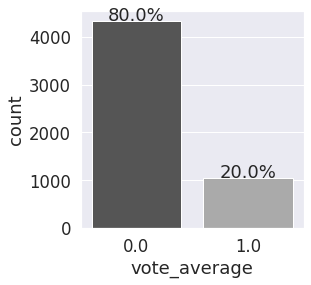

In [ ]:
# visualizing class distrbution
import seaborn as sns
percentage = [80,20]
plt.rcParams['figure.figsize'] = (4,4)
sns.set(font_scale=1.5)
plt.figure()
ax = sns.countplot(x='vote_average', data=log, palette='gray')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+3
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

###Balancing Class Weight

In [ ]:
# IMPLEMENTING LOGISTIC REGRESSION

model = LogisticRegression(class_weight='balanced')

fit_model = model.fit(X_train, y_train)                                       
pred_model = fit_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Logistic Classifier:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))

confusion matrix
[[650 212]
 [ 42 172]]


Accuracy of Logistic Classifier: 76.39405204460967 

              precision    recall  f1-score   support

         0.0       0.94      0.75      0.84       862
         1.0       0.45      0.80      0.58       214

    accuracy                           0.76      1076
   macro avg       0.69      0.78      0.71      1076
weighted avg       0.84      0.76      0.78      1076



###Manual Weights Using Gridsearch

In [ ]:
model = LogisticRegression()

#Setting the range for class weights
# generate numbers between 0 & 1, 200 times
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
# minority class = weight
# majority class = 1-weight
param_grid = {'class_weight': [{0:1.0-x, 1:x} for x in weights]}

search = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, refit=True)
fit_model = search.fit(X_train, y_train)                                      
best_model = fit_model.best_estimator_  
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Logistic regression Classifier:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))
print('best weights: ', fit_model.best_params_)

confusion matrix
[[822  40]
 [124  90]]


Accuracy of Logistic regression Classifier: 84.75836431226766 

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       862
         1.0       0.69      0.42      0.52       214

    accuracy                           0.85      1076
   macro avg       0.78      0.69      0.72      1076
weighted avg       0.83      0.85      0.83      1076

best weights:  {'class_weight': {0: 0.45773869346733664, 1: 0.5422613065326634}}


###SMOTE - OverSampling Minority Class

In [ ]:
# Use SMOTE to oversample minority class

# seperate predictor and response variable
x = log.drop(['vote_average'], axis=1)  
y = log['vote_average']  

# transform the dataset
oversample = SMOTE(random_state = 42)
X, Y = oversample.fit_resample(x, y)

In [ ]:
# create new df with the resampled x columns
resampled = pd.DataFrame(X)

# rename all the columns with the original column names
resampled.columns = x.columns

# add the y column
resampled['vote_average'] = Y

In [ ]:
# check class imbalance
resampled['vote_average'].value_counts()

0.0    4322
1.0    4322
Name: vote_average, dtype: int64

In [ ]:
# seperate predictor and response variable
x = resampled.drop(['vote_average'], axis=1)  
y = resampled['vote_average'] 

#split the data with test = 20%   train = 80%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 

In [ ]:
# Applying classifier on the sampled df
model = LogisticRegression()

fit_model = model.fit(X_train, y_train)                                       
pred_model = fit_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Decision Tree Classifier:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))

confusion matrix
[[679 207]
 [161 682]]


Accuracy of Decision Tree Classifier: 78.71602082128398 

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       886
         1.0       0.77      0.81      0.79       843

    accuracy                           0.79      1729
   macro avg       0.79      0.79      0.79      1729
weighted avg       0.79      0.79      0.79      1729



In [ ]:
model.coef_

array([[-1.24947594, -0.45778197,  0.62064427,  1.25912892, -0.75225391,
         0.03881051,  1.59737541, -0.9889025 , -0.38797743,  1.05206694,
         0.1014833 , -0.40241362, -0.36180383, -2.0752769 ,  0.23864877,
        -1.93759037, -0.47321399, -0.04692346, -0.9575663 , -0.53552981,
        -0.91261139, -0.01632472, -0.40989647]])

In [ ]:
x.columns

Index(['budget', 'belongs_to_collection', 'runtime', 'vote_count', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
x.shape

(8644, 23)

In [ ]:
l = []
for i in range(8644):
  l.append(1)

In [ ]:
len(l)

8644

In [ ]:
new = x.copy()
new['constant'] = l

In [ ]:
first_column = new.pop('constant')
new.insert(0, 'constant', first_column)

In [ ]:
new.head()

In [ ]:
x.head()

In [ ]:

params = np.append(model.intercept_,model.coef_)


newX = pd.DataFrame({"Constant":np.ones(len(x))}).join(pd.DataFrame(x))
MSE = (sum((y_test-pred_model)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.iloc[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3['Attributes'],myDF3["Coefficients"],myDF3["Probabilities"] = [new.columns,params,p_values]
print(myDF3)

               Attributes  Coefficients  Probabilities
0                constant       -0.3603          0.000
1                  budget       -1.2495          0.000
2   belongs_to_collection       -0.4578          0.000
3                 runtime        0.6206          0.000
4              vote_count        1.2591          0.000
5                  Action       -0.7523          0.000
6               Adventure        0.0388          0.000
7               Animation        1.5974          0.000
8                  Comedy       -0.9889          0.000
9                   Crime       -0.3880          0.000
10            Documentary        1.0521          0.000
11                  Drama        0.1015          0.000
12                 Family       -0.4024          0.000
13                Fantasy       -0.3618          0.000
14                Foreign       -2.0753          0.000
15                History        0.2386          0.000
16                 Horror       -1.9376          0.000
17        

#Predict a Movie Instance

In [ ]:
x.columns

Index(['budget', 'belongs_to_collection', 'runtime', 'vote_count', 'Animation',
       'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama',
       'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction',
       'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western'],
      dtype='object')

In [ ]:
# Create a dict with a new movie instance containig the following values
dictt = {'budget':[3],'belongs_to_collection':[0],'runtime':[1],'vote_count':[2],
         'Animation':[0],'Comedy':[1],'Family':[0],'Adventure':[0],
         'Fantasy':[0],'Romance':[1],'Drama':[0],'Action':[1],'Crime':[0],
         'Thriller':[0],'Horror':[0],'History':[0],'Science Fiction':[0],'Mystery':[0],
         'War':[0],'Foreign':[0],'Music':[0],'Documentary':[0],'Western':[0]}

movie = pd.DataFrame(dictt)

In [ ]:
pred = fit_model.predict(movie)
print('This movie will have a rating class of: ', pred[0])

This movie will have a rating class of:  0.0
